# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will use your trained model to generate captions for images in the test dataset.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Get Data Loader for Test Dataset 
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset

Before running the code cell below, define the transform in `transform_test` that you would like to use to pre-process the test images.  

Make sure that the transform that you define here agrees with the transform that you used to pre-process the training images (in **2_Training.ipynb**).  For instance, if you normalized the training images, you should also apply the same normalization procedure to the test images.

In [1]:
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


Run the code cell below to visualize an example test image, before pre-processing is applied.

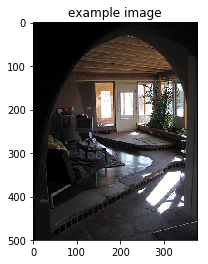

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

<a id='step2'></a>
## Step 2: Load Trained Models

In the next code cell we define a `device` that you will use move PyTorch tensors to GPU (if CUDA is available).  Run this code cell before continuing.

In [5]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Before running the code cell below, complete the following tasks.

### Task #1

In the next code cell, you will load the trained encoder and decoder from the previous notebook (**2_Training.ipynb**).  To accomplish this, you must specify the names of the saved encoder and decoder files in the `models/` folder (e.g., these names should be `encoder-5.pkl` and `decoder-5.pkl`, if you trained the model for 5 epochs and saved the weights after each epoch).  

### Task #2

Plug in both the embedding size and the size of the hidden layer of the decoder corresponding to the selected pickle file in `decoder_file`.

In [39]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
#encoder_file = 'encoder-1-outof-1.pkl'
#decoder_file = 'decoder-1-outof-1.pkl'

encoder_file = 'encoder-3-outof-3.pkl'
decoder_file = 'decoder-3-outof-3.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


DecoderRNN(
  (embed_layer): Embedding(8855, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (dropout): Dropout(p=0.5)
  (fc): Linear(in_features=512, out_features=8855, bias=True)
)

<a id='step3'></a>
## Step 3: Finish the Sampler

Before executing the next code cell, you must write the `sample` method in the `DecoderRNN` class in **model.py**.  This method should accept as input a PyTorch tensor `features` containing the embedded input features corresponding to a single image.

It should return as output a Python list `output`, indicating the predicted sentence.  `output[i]` is a nonnegative integer that identifies the predicted `i`-th token in the sentence.  The correspondence between integers and tokens can be explored by examining either `data_loader.dataset.vocab.word2idx` (or `data_loader.dataset.vocab.idx2word`).

After implementing the `sample` method, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.  Do **not** modify the code in the cell below. 

In [40]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

example output: [0, 3, 857, 28, 21, 3, 713, 6, 3, 112, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [27]:
r = data_loader.dataset.vocab.idx2word 
print (type(r))
for k,v in r.items():
    print (k,v)

<class 'dict'>
0 <start>
1 <end>
2 <unk>
3 a
4 very
5 clean
6 and
7 well
8 decorated
9 empty
10 bathroom
11 panoramic
12 view
13 of
14 kitchen
15 all
16 its
17 appliances
18 .
19 blue
20 white
21 with
22 butterfly
23 themed
24 wall
25 tiles
26 photo
27 dining
28 room
29 stop
30 sign
31 across
32 the
33 street
34 from
35 red
36 car
37 vandalized
38 beetle
39 on
40 road
41 border
42 butterflies
43 paint
44 walls
45 above
46 it
47 an
48 angled
49 beautifully
50 two
51 people
52 are
53 walking
54 down
55 beach
56 sink
57 toilet
58 inside
59 small
60 black
61 square
62 tile
63 floor
64 that
65 needs
66 repairs
67 vanity
68 contains
69 sinks
70 towel
71 for
72 each
73 several
74 metal
75 balls
76 sit
77 in
78 sand
79 near
80 group
81 carrying
82 surf
83 boards
84 brown
85 cabinets
86 ,
87 backsplash
88 grey
89 counters
90 surfer
91 woman
92 child
93 walk
94 few
95 dim
96 transportation
97 system
98 person
99 protected
100 rain
101 by
102 their
103 umbrella
104 walks
105 has
106 interesting
1

1452 fireplace
1453 show
1454 stool
1455 tries
1456 images
1457 process
1458 oranges
1459 skyline
1460 donuts
1461 mean
1462 diving
1463 gear
1464 tanks
1465 skateboarders
1466 jet
1467 engine
1468 dollhouse
1469 drivers
1470 wallpapered
1471 standard
1472 lavatory
1473 giant
1474 hole
1475 basic
1476 fixing
1477 french
1478 bucket
1479 beard
1480 grain
1481 tennis
1482 vintage
1483 u.s.
1484 pouring
1485 cheese
1486 scale
1487 compartments
1488 hanged
1489 thre
1490 gloves
1491 kneeled
1492 oats
1493 babies
1494 cigar
1495 leashed
1496 peer
1497 odd
1498 fully
1499 borders
1500 buses
1501 tricycle
1502 walkway
1503 folding
1504 mostly
1505 dismantled
1506 littered
1507 elbow
1508 hiding
1509 contain
1510 central
1511 preparation
1512 medical
1513 plan
1514 bearded
1515 shade
1516 caucasian
1517 works
1518 row
1519 slices
1520 sorting
1521 buss
1522 jacket
1523 mother
1524 carries
1525 beer
1526 toward
1527 rests
1528 radishes
1529 garbage
1530 chrome
1531 photographs
1532 snowfall
153

2143 washed
2144 session
2145 cuddles
2146 comfort
2147 homeless
2148 belongings
2149 herds
2150 africa
2151 messed
2152 checks
2153 hoodie
2154 peeing
2155 huddle
2156 students
2157 soldier
2158 bent
2159 turned
2160 chandelier
2161 flipping
2162 dough
2163 seriously
2164 abandoned
2165 warm
2166 reigns
2167 type
2168 meat
2169 panels
2170 cabinetry
2171 bizarre
2172 job
2173 adjacent
2174 robe
2175 gadgets
2176 avid
2177 cross-country
2178 snowing
2179 shutter
2180 military
2181 buggy
2182 football
2183 trinkets
2184 wooded
2185 pasture
2186 stovetop
2187 peanut
2188 butter
2189 tattoos
2190 bell
2191 pepper
2192 spoons
2193 burner
2194 beyond
2195 stream
2196 bow
2197 washbasin
2198 elderly
2199 walker
2200 kept
2201 passed
2202 muzzle
2203 note
2204 written
2205 furnishings
2206 wtih
2207 desert
2208 partially
2209 eaten
2210 tubs
2211 podium
2212 mans
2213 rest
2214 funky
2215 wildly
2216 print
2217 brand
2218 dole
2219 desktop
2220 artwork
2221 depicting
2222 monitor
2223 radio
2

3513 toss
3514 shift
3515 nuts
3516 america
3517 scallions
3518 fallen
3519 parka
3520 servings
3521 razor
3522 constructed
3523 early
3524 stance
3525 holiday
3526 caption
3527 breaking
3528 tram
3529 sealed
3530 shady
3531 forested
3532 landscape
3533 fat
3534 hamburger
3535 semi
3536 cozy
3537 muscles
3538 basement
3539 distant
3540 baggage
3541 loaf
3542 kimono
3543 conventional
3544 stable
3545 tilted
3546 pane
3547 conversing
3548 racquet
3549 ridden
3550 leave
3551 crossword
3552 bathed
3553 wheelchair
3554 tin
3555 angles
3556 performers
3557 india
3558 leather
3559 volkswagen
3560 napkin
3561 dugout
3562 3
3563 countryside
3564 cooker
3565 parent
3566 bagel
3567 smashed
3568 overcoat
3569 underground
3570 arrows
3571 investigates
3572 drawing
3573 plated
3574 goldfish
3575 elaborate
3576 insides
3577 squash
3578 overlooks
3579 warmer
3580 vane
3581 duel
3582 backpacks
3583 plush
3584 crab
3585 frying
3586 wedged
3587 lighthouse
3588 boring
3589 races
3590 canoes
3591 tunnel
35

4447 joke
4448 safely
4449 tale
4450 glares
4451 embedded
4452 plaster
4453 hitter
4454 umpire
4455 photographic
4456 sheering
4457 corded
4458 applied
4459 w
4460 shearing
4461 oblong
4462 locker
4463 jumpsuit
4464 gentlemen
4465 cape
4466 deckered
4467 stret
4468 emptying
4469 toiler
4470 hundreds
4471 skyscrapers
4472 parachute
4473 floats
4474 expanse
4475 vessel
4476 vents
4477 vending
4478 watery
4479 wing
4480 lightly
4481 marketplace
4482 khakis
4483 prison
4484 saab
4485 dealership
4486 ordered
4487 layed
4488 vines
4489 shooting
4490 curl
4491 assembled
4492 ivy
4493 barking
4494 grungy
4495 messenger
4496 fighting
4497 hedge
4498 sweatshirt
4499 socks
4500 yelling
4501 chic
4502 buds
4503 ears
4504 cay
4505 tending
4506 buying
4507 parrot
4508 clinging
4509 gooey
4510 vision
4511 long-haired
4512 brunette
4513 jogging
4514 merry
4515 knitted
4516 cuddle
4517 wares
4518 units
4519 waterway
4520 crocheted
4521 birch
4522 carousel
4523 snuggling
4524 planter
4525 arrive
4526 gi

5201 juggling
5202 bust
5203 yarn
5204 ethnic
5205 blind
5206 wilderness
5207 motorists
5208 mount
5209 page
5210 describe
5211 hosing
5212 congregating
5213 chipped
5214 hops
5215 stalk
5216 cherry
5217 blossom
5218 closely
5219 ith
5220 flannel
5221 rent
5222 stereo
5223 strolling
5224 nature
5225 finger
5226 thumb
5227 barely
5228 pleasant
5229 afternoon
5230 straining
5231 sin
5232 blossoms
5233 photographers
5234 tasty
5235 marathon
5236 shark
5237 upstairs
5238 boulder
5239 examined
5240 later
5241 jumped
5242 stalks
5243 largely
5244 abundant
5245 avoid
5246 diverse
5247 assembling
5248 swan
5249 stems
5250 lilies
5251 straws
5252 saw
5253 peers
5254 chess
5255 closes
5256 sunflower
5257 aligned
5258 octopus
5259 allot
5260 harry
5261 screens
5262 casually
5263 squid
5264 stump
5265 taller
5266 sled
5267 wax
5268 shapes
5269 paid
5270 freeze
5271 learns
5272 celebrates
5273 seal
5274 kabob
5275 appetizing
5276 crammed
5277 creams
5278 available
5279 beef
5280 veggie
5281 tier
52

6102 leftover
6103 becoming
6104 musical
6105 patchy
6106 bib
6107 duct
6108 atv
6109 printing
6110 butt
6111 joint
6112 media
6113 aircrafts
6114 flat-screen
6115 spitting
6116 peaceful
6117 pin
6118 bunk
6119 allowing
6120 tangled
6121 smoggy
6122 dollar
6123 bill
6124 accordion
6125 gauges
6126 fulled
6127 ally
6128 dawn
6129 dvd
6130 kiwis
6131 unison
6132 accept
6133 clapping
6134 silos
6135 sheeps
6136 redheaded
6137 te
6138 pavers
6139 mama
6140 llama
6141 cheering
6142 important
6143 movies
6144 feeder
6145 parakeet
6146 completed
6147 themes
6148 skyteam
6149 roped
6150 sony
6151 casing
6152 mid-flight
6153 plaque
6154 weaving
6155 penny
6156 fireworks
6157 miss
6158 towers
6159 foundation
6160 leak
6161 tim
6162 grinning
6163 wreck
6164 lazing
6165 erect
6166 captures
6167 desolate
6168 gliders
6169 supermarket
6170 proceeding
6171 exhibition
6172 rounding
6173 digging
6174 obese
6175 disposable
6176 gleaming
6177 calculator
6178 holidays
6179 domed
6180 mingle
6181 u
6182 fl

6948 lapsed
6949 greyhound
6950 creatures
6951 hazard
6952 railways
6953 limbs
6954 papered
6955 crossroads
6956 guided
6957 again
6958 crest
6959 emerging
6960 dumpster
6961 rotting
6962 pineapples
6963 densely
6964 horizontal
6965 prominent
6966 off-road
6967 streak
6968 crepe
6969 markers
6970 host
6971 health
6972 hydrogen
6973 candies
6974 -
6975 canopies
6976 loop
6977 badly
6978 weed
6979 wreath
6980 ducklings
6981 multi-lane
6982 logos
6983 livestock
6984 herder
6985 john
6986 picturesque
6987 majestic
6988 llamas
6989 advertisements
6990 squirrel
6991 shorn
6992 munches
6993 galloping
6994 leafless
6995 gazelle
6996 ion
6997 ewe
6998 staked
6999 contrast
7000 wades
7001 vista
7002 memory
7003 peter
7004 tours
7005 trouble
7006 staged
7007 sites
7008 waterhole
7009 crosswalks
7010 snowman
7011 buttery
7012 bushy
7013 marshy
7014 paddock
7015 chevrolet
7016 gazelles
7017 nursing
7018 olympics
7019 trestle
7020 frosty
7021 bleachers
7022 chinatown
7023 announcing
7024 interest
70

8132 passport
8133 lollipop
8134 silk
8135 actions
8136 knotted
8137 ice-cream
8138 waterskiing
8139 campground
8140 wakeboarding
8141 handlers
8142 peripherals
8143 yankees
8144 email
8145 ward
8146 sown
8147 selections
8148 reporters
8149 gondola
8150 sunbathers
8151 luncheon
8152 bracelets
8153 courch
8154 gelato
8155 professionals
8156 stepped
8157 gripping
8158 mickey
8159 ashore
8160 backup
8161 paisley
8162 bud
8163 headset
8164 geek
8165 slid
8166 managing
8167 koala
8168 kayaking
8169 operate
8170 sixteen
8171 watercraft
8172 lunches
8173 bridal
8174 walkie
8175 sailboard
8176 dragged
8177 scrambled
8178 crumb
8179 blackened
8180 belong
8181 hurry
8182 drags
8183 chunky
8184 articles
8185 applauding
8186 fairy
8187 hurdles
8188 southwestern
8189 seminar
8190 crescent
8191 croissants
8192 chests
8193 mittens
8194 saddles
8195 bunting
8196 tried
8197 crush
8198 usb
8199 unplugged
8200 persian
8201 29
8202 checkpoint
8203 tanning
8204 cub
8205 budweiser
8206 greenhouse
8207 mints

<a id='step4'></a>
## Step 4: Clean up the Captions

In the code cell below, complete the `clean_sentence` function.  It should take a list of integers (corresponding to the variable `output` in **Step 3**) as input and return the corresponding predicted sentence (as a single Python string). 

In [10]:
# TODO #4: Complete the function.
def clean_sentence(output):
    dict_index_2_word = data_loader.dataset.vocab.idx2word 
    sentence = ''
    for i in output:
        if i not in (0,1):
            word = dict_index_2_word[i]
            space = ' '
            word += space
            sentence += word
    
    return sentence

After completing the `clean_sentence` function above, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.

In [41]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence: a living room with a couch and a table 


<a id='step5'></a>
## Step 5: Generate Predictions!

In the code cell below, we have written a function (`get_prediction`) that you can use to use to loop over images in the test dataset and print your model's predicted caption.

In [42]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

Run the code cell below (multiple times, if you like!) to test how this function works.

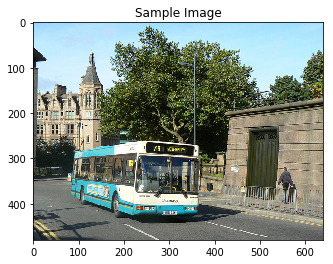

a train is on the tracks at a station . 


In [43]:
get_prediction()

As the last task in this project, you will loop over the images until you find four image-caption pairs of interest:
- Two should include image-caption pairs that show instances when the model performed well.
- Two should highlight image-caption pairs that highlight instances where the model did not perform well.

Use the four code cells below to complete this task.

### The model performed well!

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively accurate captions.

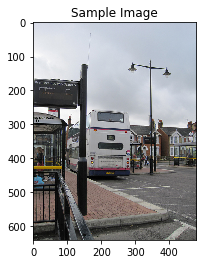

a red and white bus driving down a street . 


In [46]:
get_prediction()

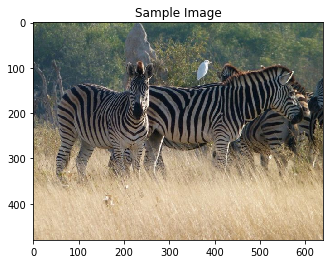

a zebra standing in a field of grass . 


In [71]:
get_prediction()

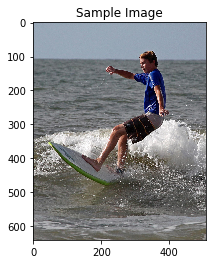

a man riding a wave on top of a surfboard . 


In [84]:
get_prediction()

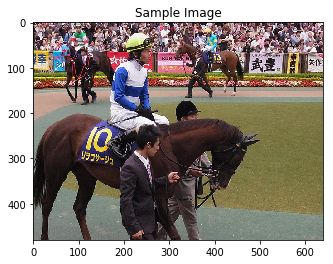

a man is riding a horse in the middle of a field . 


In [90]:
get_prediction()

### The model could have performed better ...

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively inaccurate captions.

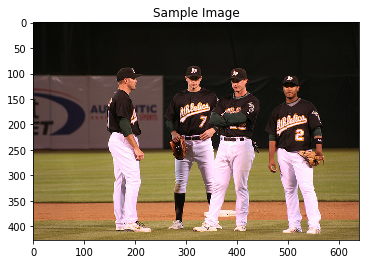

a man is swinging a tennis racket at a ball . 


In [74]:
get_prediction()

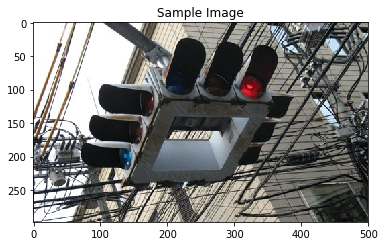

a clock tower with a clock on it 's side . . 


In [83]:
get_prediction()

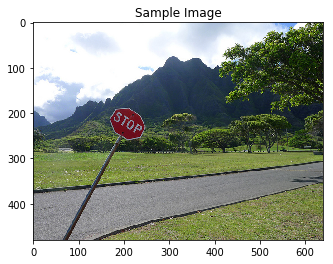

a man is riding a skateboard on a ramp . 


In [93]:
get_prediction()

# Just for reference- sample output with all layer sizes and for each word 

In [ ]:
#sample output with all layer sizes and for each word 

inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 0], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  0
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 3], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  3
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 14], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  14
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 21], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  21
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 3], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  3
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 534], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  534
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 6], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  6
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 3], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  3
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 475], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  475
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 18], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  18
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 1], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  1
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 1], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  1
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 1], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  1
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 1], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  1
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 1], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  1
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 1], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  1
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 1], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  1
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 1], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  1
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 18], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  18
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
inputs size torch.Size([1, 1, 512])
inputs_after_lstm size torch.Size([1, 1, 512])
inputs_after_dropout size torch.Size([1, 1, 512])
inputs_after_linear size torch.Size([1, 1, 8855])
inputs_after_linear_two_dim size torch.Size([1, 8855])
max_pred_index tensor([ 1], device='cuda:0')
max_pred_index size torch.Size([1])
out_pred  1
next input size torch.Size([1, 1])
next input embedded size torch.Size([1, 1, 512])
example output: [0, 3, 14, 21, 3, 534, 6, 3, 475, 18, 1, 1, 1, 1, 1, 1, 1, 1, 18, 1]

In [ ]:
example sentence: a kitchen with a stove and a microwave . . 